## 1. Importing Libraries and reading data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('diabetes_dataset.csv')


In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96999 entries, 0 to 96998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  96999 non-null  int64  
 1   gender                96999 non-null  object 
 2   age                   96999 non-null  float64
 3   location              96999 non-null  object 
 4   race:AfricanAmerican  96999 non-null  int64  
 5   race:Asian            96999 non-null  int64  
 6   race:Caucasian        96999 non-null  int64  
 7   race:Hispanic         96999 non-null  int64  
 8   race:Other            96999 non-null  int64  
 9   hypertension          96999 non-null  int64  
 10  heart_disease         96999 non-null  int64  
 11  smoking_history       96999 non-null  object 
 12  bmi                   96999 non-null  float64
 13  hbA1c_level           96999 non-null  float64
 14  blood_glucose_level   96999 non-null  int64  
 15  diabetes           

In [5]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000,96999.000000
mean,2018.382004,41.867462,0.201817,0.199786,0.199177,0.199198,0.200023,0.074929,0.039433,27.319709,5.527928,138.058423,0.084939
std,1.328408,22.507209,0.401358,0.399841,0.399384,0.399399,0.400019,0.263277,0.194625,6.638739,1.070681,40.729930,0.278792
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.570000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


/tmp/ipykernel_5214/1138790883.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["hbA1c_level"].value_counts().index, y=df["hbA1c_level"].value_counts(), palette="coolwarm")
/tmp/ipykernel_5214/1138790883.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["blood_glucose_level"].value_counts().index, y=df["blood_glucose_level"].value_counts(), palette="magma")


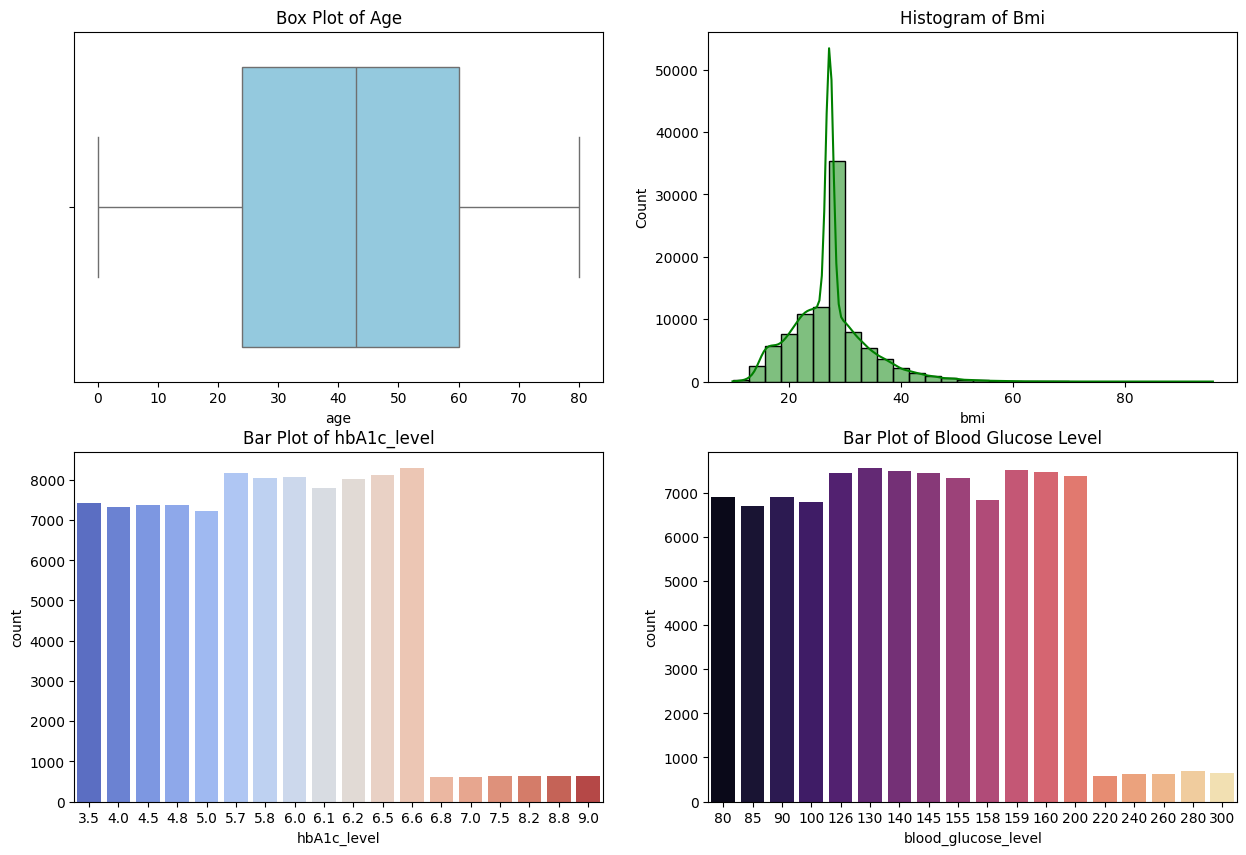

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["age"], color="skyblue")
plt.title("Box Plot of Age")

plt.subplot(2, 2, 2)
sns.histplot(df["bmi"], bins=30, kde=True, color="green")
plt.title("Histogram of Bmi")

plt.subplot(2, 2, 3)
sns.barplot(x=df["hbA1c_level"].value_counts().index, y=df["hbA1c_level"].value_counts(), palette="coolwarm")
plt.title("Bar Plot of hbA1c_level")

plt.subplot(2, 2, 4)
sns.barplot(x=df["blood_glucose_level"].value_counts().index, y=df["blood_glucose_level"].value_counts(), palette="magma")
plt.title("Bar Plot of Blood Glucose Level")

plt.show()


## 2. Exploratory Data Analysis

### Year

In [7]:
# Exploring the year column
year = df['year'].value_counts().reset_index().rename(columns={'count':'number_of_entires'})

In [8]:
year

,year,number_of_entires
0,2019,78021
1,2015,8256
2,2016,8165
3,2018,2502
4,2020,41
5,2021,7
6,2022,7


 ### Gender 

In [9]:
gender = df['gender'].value_counts().reset_index().rename(columns={0:'No of entries'})
gender

,gender,count
0,Female,56801
1,Male,40180
2,Other,18


In [10]:
print(gender.head())
print(gender.columns)


   gender  count
0  Female  56801
1    Male  40180
2   Other     18
Index(['gender', 'count'], dtype='object')


In [11]:
gender = df['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']


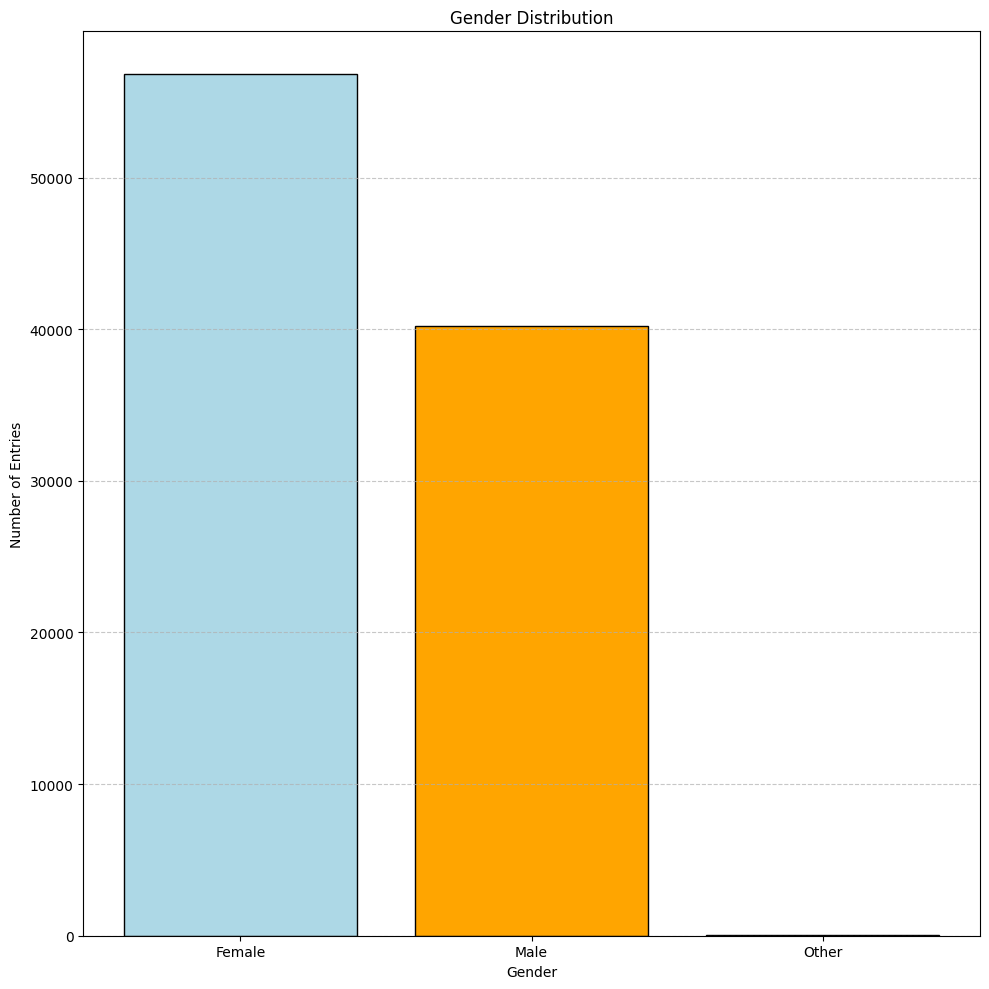

In [12]:
plt.figure(figsize=(10, 10))
plt.bar(gender['gender'], gender['count'], color=['lightblue', 'orange', 'purple'], edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Entries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Age

In [13]:
# Exploring the age column
age = df['age'].value_counts().reset_index().rename(columns={'count':'No_of_entires'})

In [14]:
age

,age,No_of_entires
0,80.00,5427
1,51.00,1578
2,48.00,1521
3,47.00,1515
4,52.00,1491
...,...,...
97,1.00,80
98,0.48,79
99,0.40,65
100,0.16,58


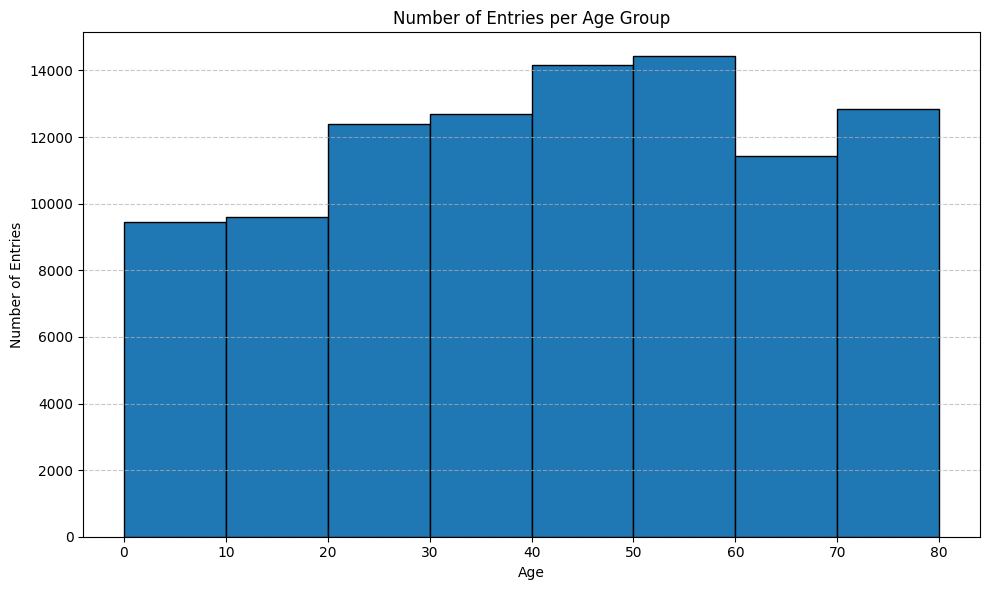

In [15]:

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=[0,10,20,30,40,50,60,70,80], edgecolor='black')
plt.title('Number of Entries per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Entries')
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Race

In [16]:
#Exploring the races 
race = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic','race:Other']]

In [17]:
zeros = (race==0).sum()
ones = (race==1).sum()
race_counts = pd.DataFrame({'zero':zeros,'one':ones})
race_counts


,zero,one
race:AfricanAmerican,77423,19576
race:Asian,77620,19379
race:Caucasian,77679,19320
race:Hispanic,77677,19322
race:Other,77597,19402


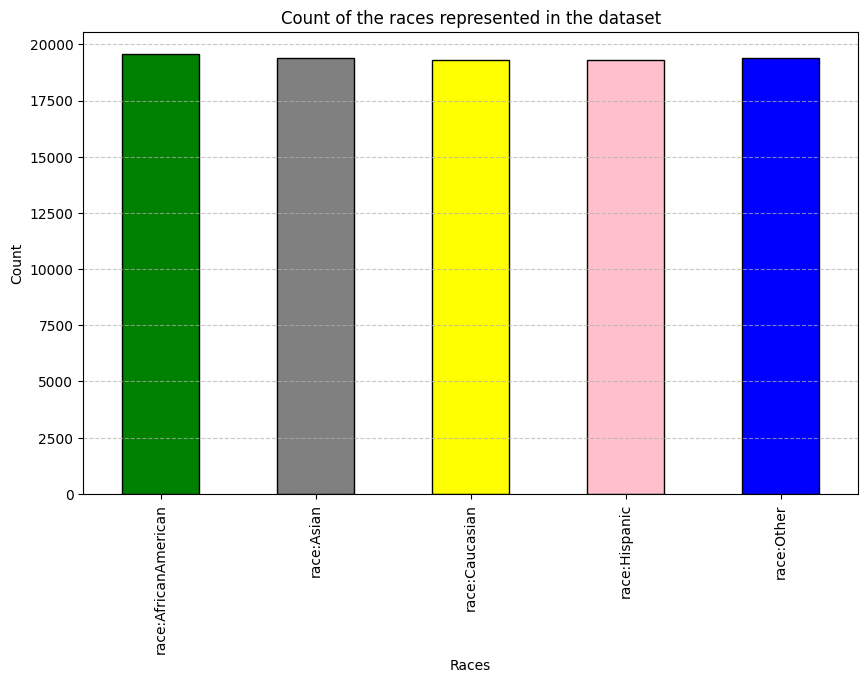

In [18]:
plt.figure(figsize=(10,6))
race_counts['one'].plot(kind='bar', edgecolor='black',color=['green','grey','yellow','pink','blue'])
plt.title('Count of the races represented in the dataset')
plt.xlabel('Races')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)


All the races are fairly represented in the dataset 

### Location


In [19]:
#Exploring locations
df['location'].nunique()

52

In [20]:
df['location'].value_counts()

location
Kentucky                2038
Hawaii                  2038
Iowa                    2038
Nebraska                2038
Florida                 2037
New Jersey              2037
Minnesota               2037
Arkansas                2037
Illinois                2036
Kansas                  2036
Alabama                 2036
Louisiana               2036
Pennsylvania            2036
Oregon                  2036
Massachusetts           2036
Michigan                2036
Maine                   2036
Delaware                2036
District of Columbia    2036
Georgia                 2036
North Dakota            2035
Missouri                2035
New Hampshire           2035
New York                2035
North Carolina          2035
Colorado                2035
Alaska                  2035
Connecticut             2035
Maryland                2035
Rhode Island            2035
Mississippi             2035
Montana                 2033
South Dakota            2033
New Mexico              2033
Idaho

Wisconsin and Wyoming have lesser entires as compared to other locations.                 

### Hypertension 

In [21]:
BP = df['hypertension'].value_counts()

In [22]:
BP.index=['No Hypertension','Have Hypertension']
BP

No Hypertension      89731
Have Hypertension     7268
Name: count, dtype: int64

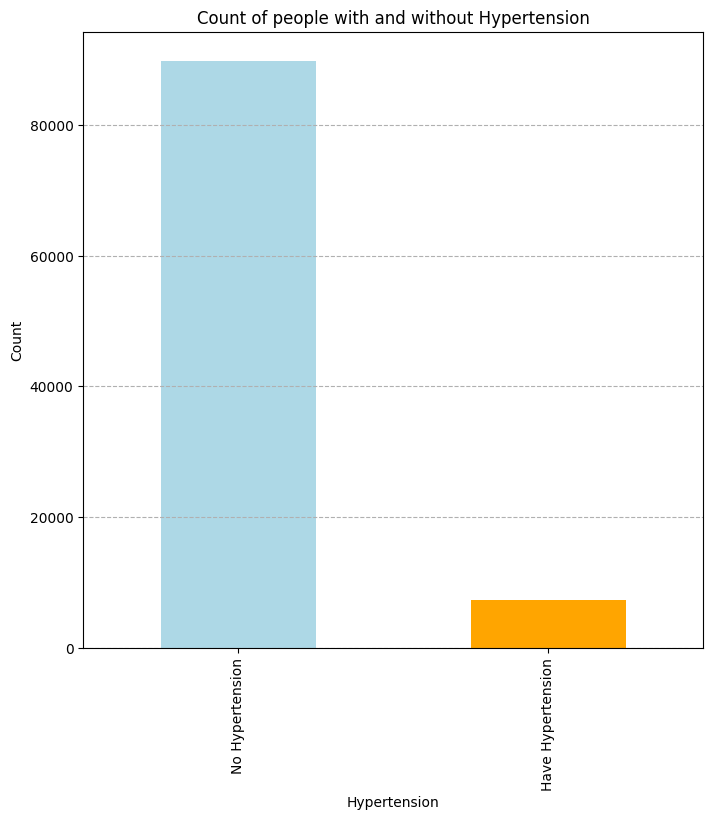

In [23]:
plt.figure(figsize=(8,8))
BP.plot(kind='bar', color=['lightblue','orange'], xlabel='Hypertension', ylabel='Count', title='Count of people with and without Hypertension')
plt.grid(axis='y', linestyle='--')
plt.show()



### Heart Disease 

In [24]:
heart_disease = df['heart_disease'].value_counts()

In [25]:
heart_disease.index=['No Heart Disease', 'Have Heart Disease']
heart_disease

No Heart Disease      93174
Have Heart Disease     3825
Name: count, dtype: int64

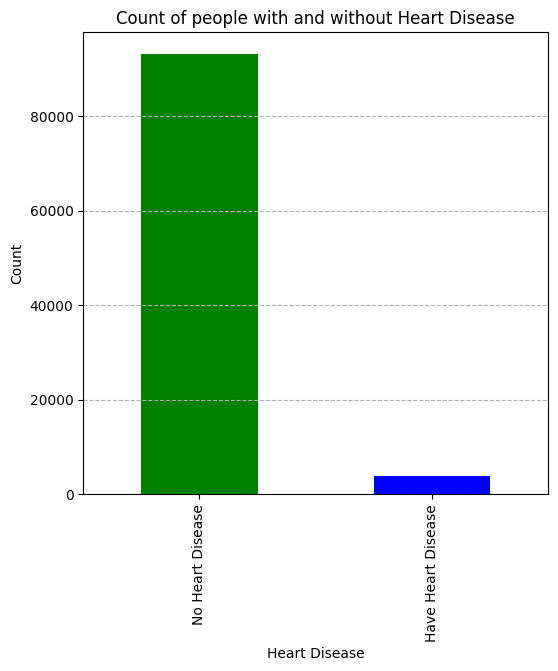

In [26]:
plt.figure(figsize=(6,6))
heart_disease.plot(kind='bar', color=['green','blue'], xlabel='Heart Disease', ylabel='Count', title='Count of people with and without Heart Disease')
plt.grid(axis='y', linestyle='--')
plt.show()

### Smoking

In [27]:
smoke = df['smoking_history'].value_counts()

In [28]:
smoke

smoking_history
No Info        34777
never          34040
former          9052
current         8998
not current     6250
ever            3882
Name: count, dtype: int64

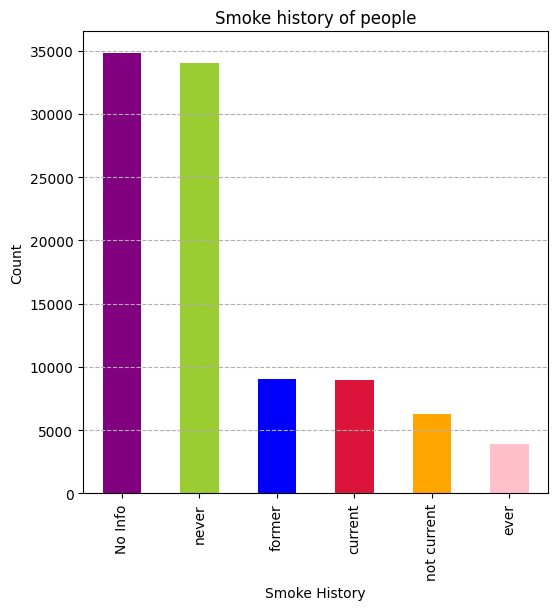

In [29]:
plt.figure(figsize=(6,6))
smoke.plot(kind='bar', color=['purple','yellowgreen','blue','crimson','orange','pink'], xlabel='Smoke History', ylabel='Count', title='Smoke history of people')
plt.grid(axis='y', linestyle='--')
plt.show()

### BMI 

In [30]:
adults = df[df['age'] >= 20] 
children = df[df['age'] < 20]

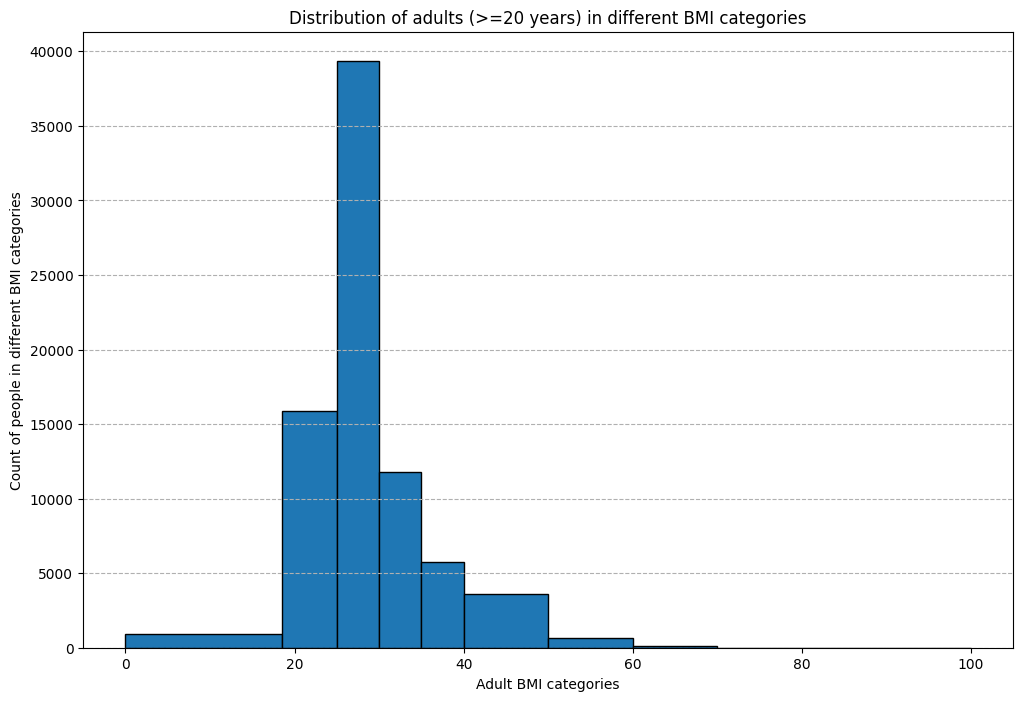

In [31]:
plt.figure(figsize=(12,8))
plt.grid(axis='y',linestyle='--')
plt.hist(adults['bmi'],bins=[0,18.5, 25, 30, 35, 40,50,60, 70, 80, 90, 100], edgecolor='black')
plt.xlabel("Adult BMI categories")
plt.ylabel("Count of people in different BMI categories")
plt.title("Distribution of adults (>=20 years) in different BMI categories")
plt.show()

In [32]:
print("Underweight: ",adults[adults['bmi'] < 18.5].bmi.count())

Underweight:  906


In [33]:
print("Healthyweight: ",adults[(adults['bmi'] >= 18.5) & (adults['bmi'] < 25)].bmi.count())

Healthyweight:  15859


In [34]:
print("Overweight: ",adults[(adults['bmi'] >= 25) & (adults['bmi'] < 30)].bmi.count())

Overweight:  39347


In [35]:
print("Obese: ",adults[adults['bmi'] >=30].bmi.count())

Obese:  21818


40536 adults lie in the range of 25-30 bmi which is the overweight category. 22514 adults in the Obesity category. 

In [36]:
class1_Obese = adults[(adults['bmi'] >= 30) & (adults['bmi'] < 35)].bmi.count()
class2_Obese = adults[(adults['bmi'] >= 35) & (adults['bmi'] < 40)].bmi.count()
class3_Obese = adults[adults['bmi'] >= 40].bmi.count()
print('Class1 Obese count: ',class1_Obese)
print('Class2 Obese count: ',class2_Obese)
print('Class3 Obese count: ',class3_Obese)


Class1 Obese count:  11752
Class2 Obese count:  5724
Class3 Obese count:  4342


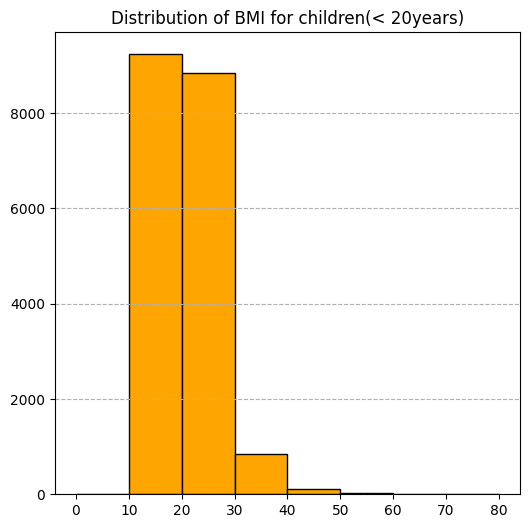

In [37]:
plt.figure(figsize=(6,6))
plt.title("Distribution of BMI for children(< 20years)")
plt.grid(axis='y',linestyle='--')
plt.hist(children['bmi'],color='orange',bins=[0,10,20,30,40,50,60,70,80],edgecolor='black')
plt.show()

### Blood glucose level and Diabetes 

In [38]:
df['blood_glucose_level'].value_counts()

blood_glucose_level
130    7556
159    7515
140    7499
160    7475
126    7459
145    7453
200    7378
155    7345
80     6904
90     6903
158    6825
100    6799
85     6706
280     702
300     659
240     623
260     618
220     580
Name: count, dtype: int64

In [39]:
normal = df[df['blood_glucose_level']<100].blood_glucose_level.count()
prediabetic = df[(df['blood_glucose_level'] >= 100 ) & (df['blood_glucose_level'] < 125)].blood_glucose_level.count()
diabetic = df[df['blood_glucose_level'] >= 125].blood_glucose_level.count()
print("Normal: ", normal)
print("Prediabetic: ", prediabetic)
print("Diabetic : ", diabetic)

Normal:  20513
Prediabetic:  6799
Diabetic :  69687


In [40]:
Blood_Glucose = pd.Series([normal,prediabetic,diabetic], index=["Normal", "Prediabetic", "Diabetic"])
Blood_Glucose

Normal         20513
Prediabetic     6799
Diabetic       69687
dtype: int64

<BarContainer object of 3 artists>

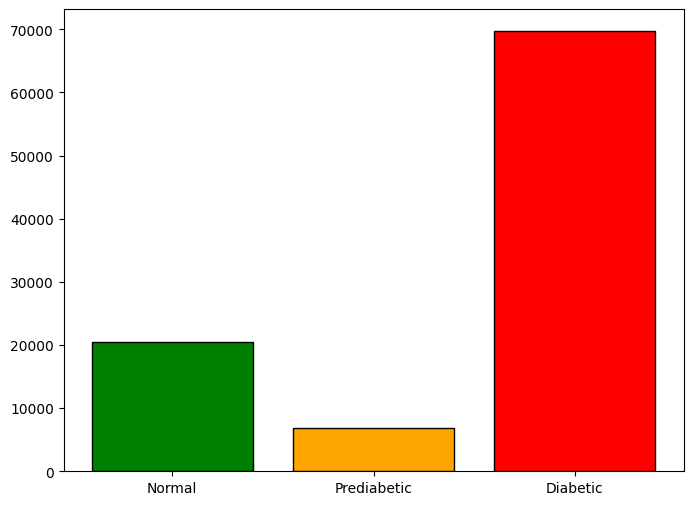

In [41]:
plt.figure(figsize=(8,6))
plt.bar(Blood_Glucose.index, Blood_Glucose.values, edgecolor='Black', color=['Green', 'Orange', 'Red'])

In [42]:
df['diabetes'].value_counts()

diabetes
0    88760
1     8239
Name: count, dtype: int64

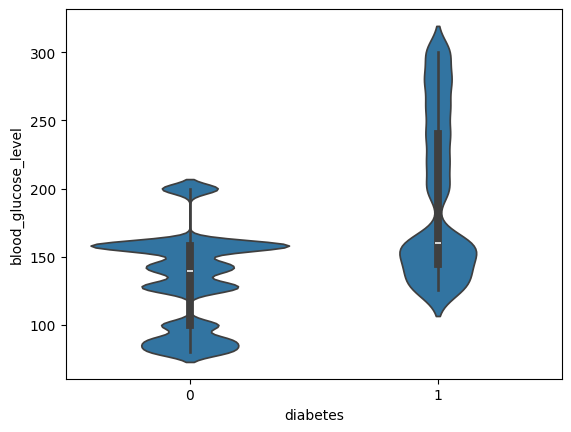

In [43]:
sns.violinplot(y='blood_glucose_level',x = 'diabetes',data=df)
plt.show()

# Relation Between Columns 

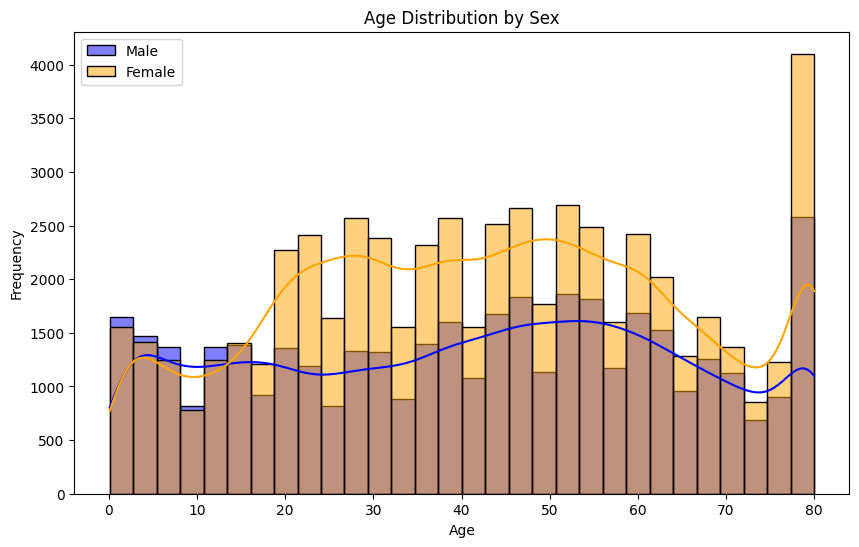

In [44]:
plt.figure(figsize=(10, 6))

# Create separate histograms for each gender
sns.histplot(df[df['gender'] == 'Male']['age'], label='Male', kde=True, color='blue', bins=30)
sns.histplot(df[df['gender'] == 'Female']['age'], label='Female', kde=True, color='orange', bins=30)

plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

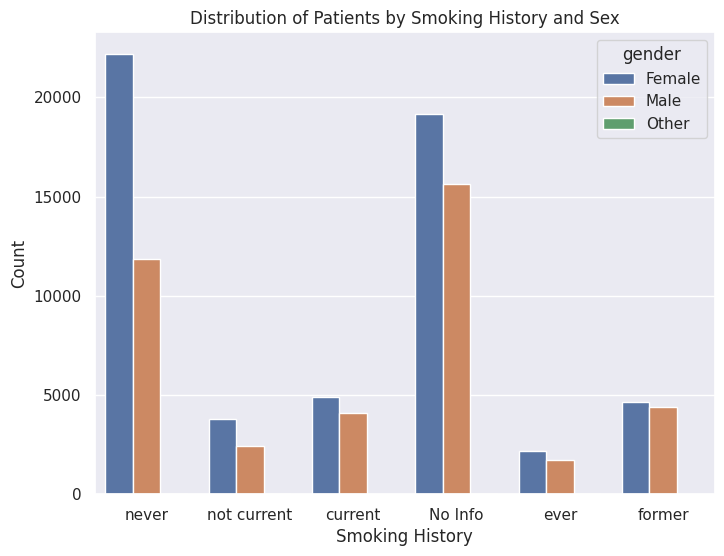

In [45]:
# Visualize the relationship between 'Pclass' and 'Sex'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_history', hue='gender', data=df)
plt.title('Distribution of Patients by Smoking History and Sex')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

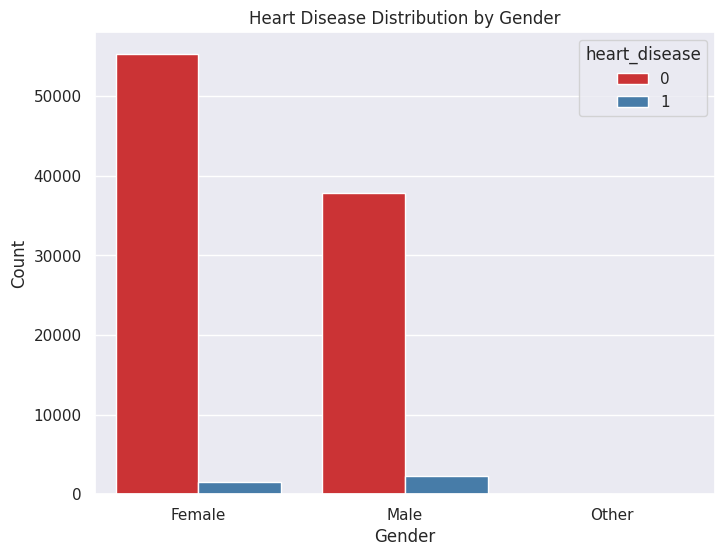

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='heart_disease', data=df, palette='Set1')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


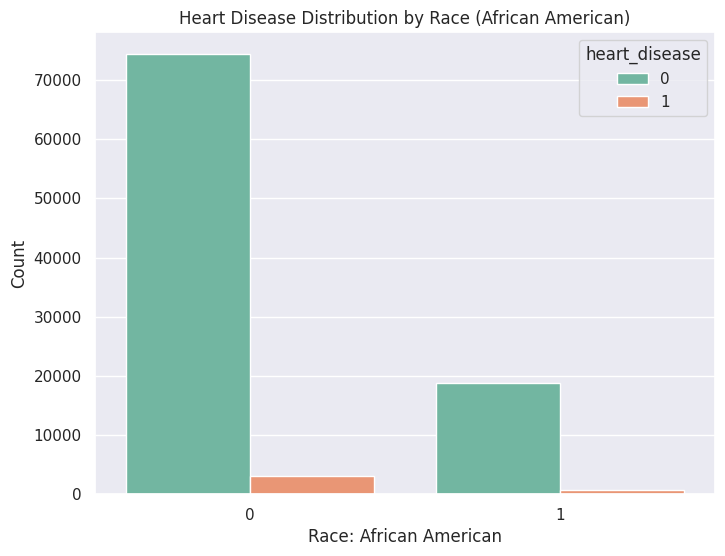

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='race:AfricanAmerican', hue='heart_disease', data=df, palette='Set2')
plt.title('Heart Disease Distribution by Race (African American)')
plt.xlabel('Race: African American')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_5214/4004896424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='heart_disease', y='age', data=df, palette='coolwarm')


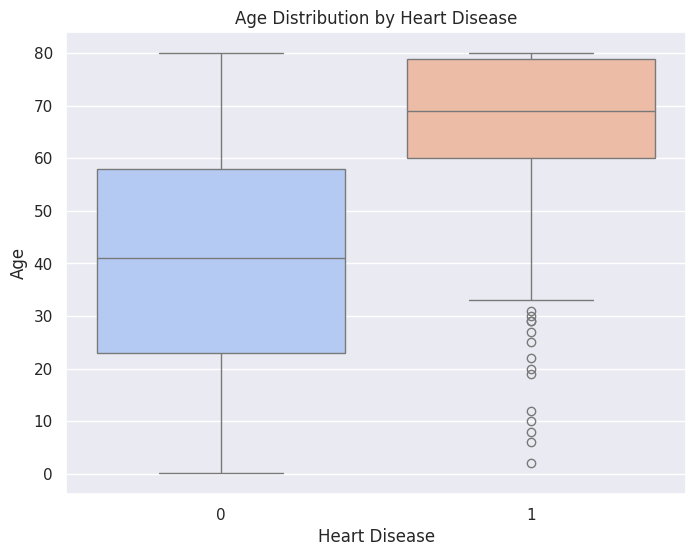

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='heart_disease', y='age', data=df, palette='coolwarm')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

/tmp/ipykernel_5214/3832289775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hypertension', y='bmi', data=df, palette='muted')


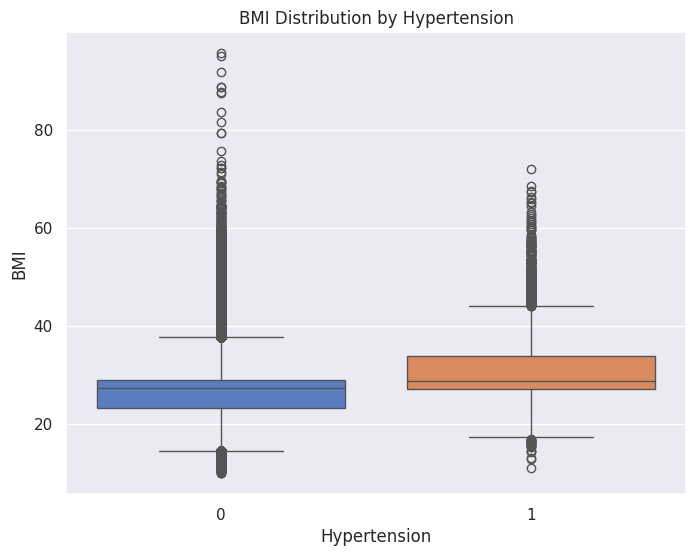

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hypertension', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('BMI')
plt.show()

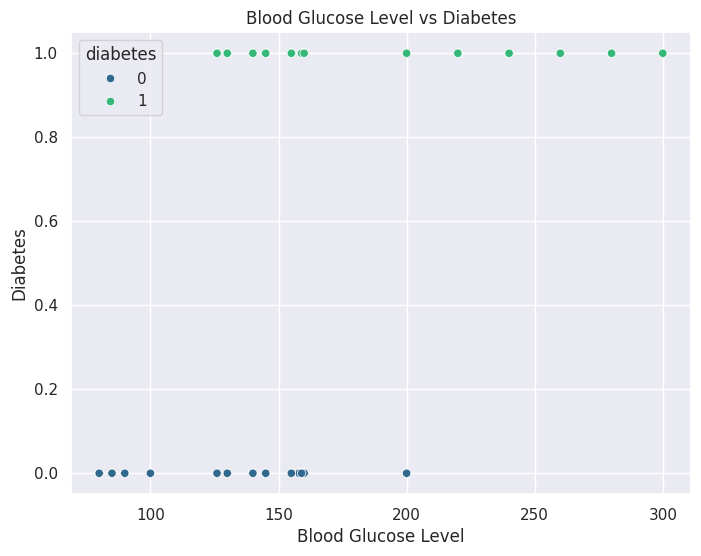

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='blood_glucose_level', y='diabetes', data=df, hue='diabetes', palette='viridis')
plt.title('Blood Glucose Level vs Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.show()

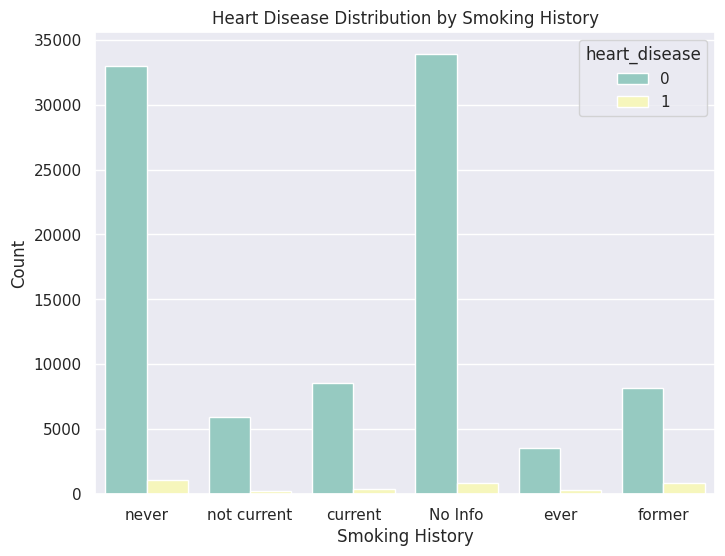

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoking_history', hue='heart_disease', data=df, palette='Set3')
plt.title('Heart Disease Distribution by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_5214/4037286188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='hbA1c_level', data=df, palette='coolwarm')


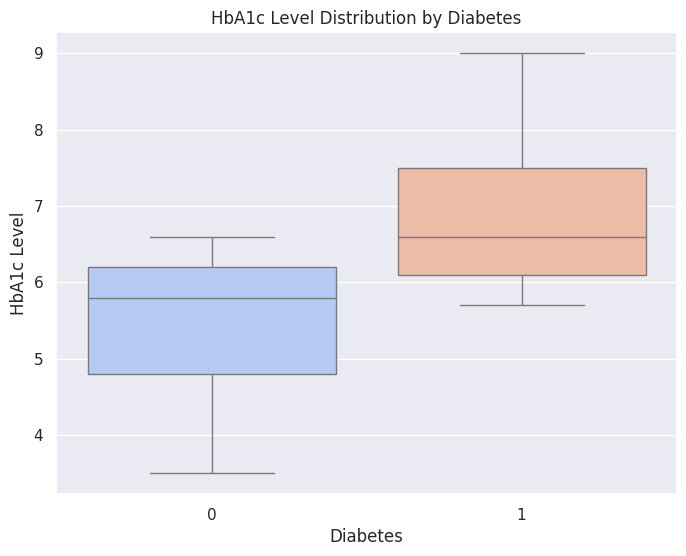

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x='diabetes', y='hbA1c_level', data=df, palette='coolwarm')
plt.title('HbA1c Level Distribution by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

/tmp/ipykernel_5214/3886260110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='heart_disease', y='bmi', data=df, palette='muted')


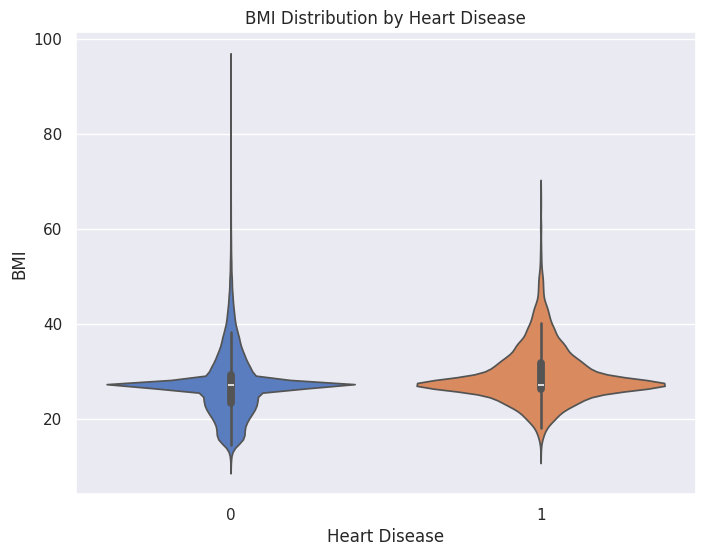

In [53]:
plt.figure(figsize=(8,6))
sns.violinplot(x='heart_disease', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

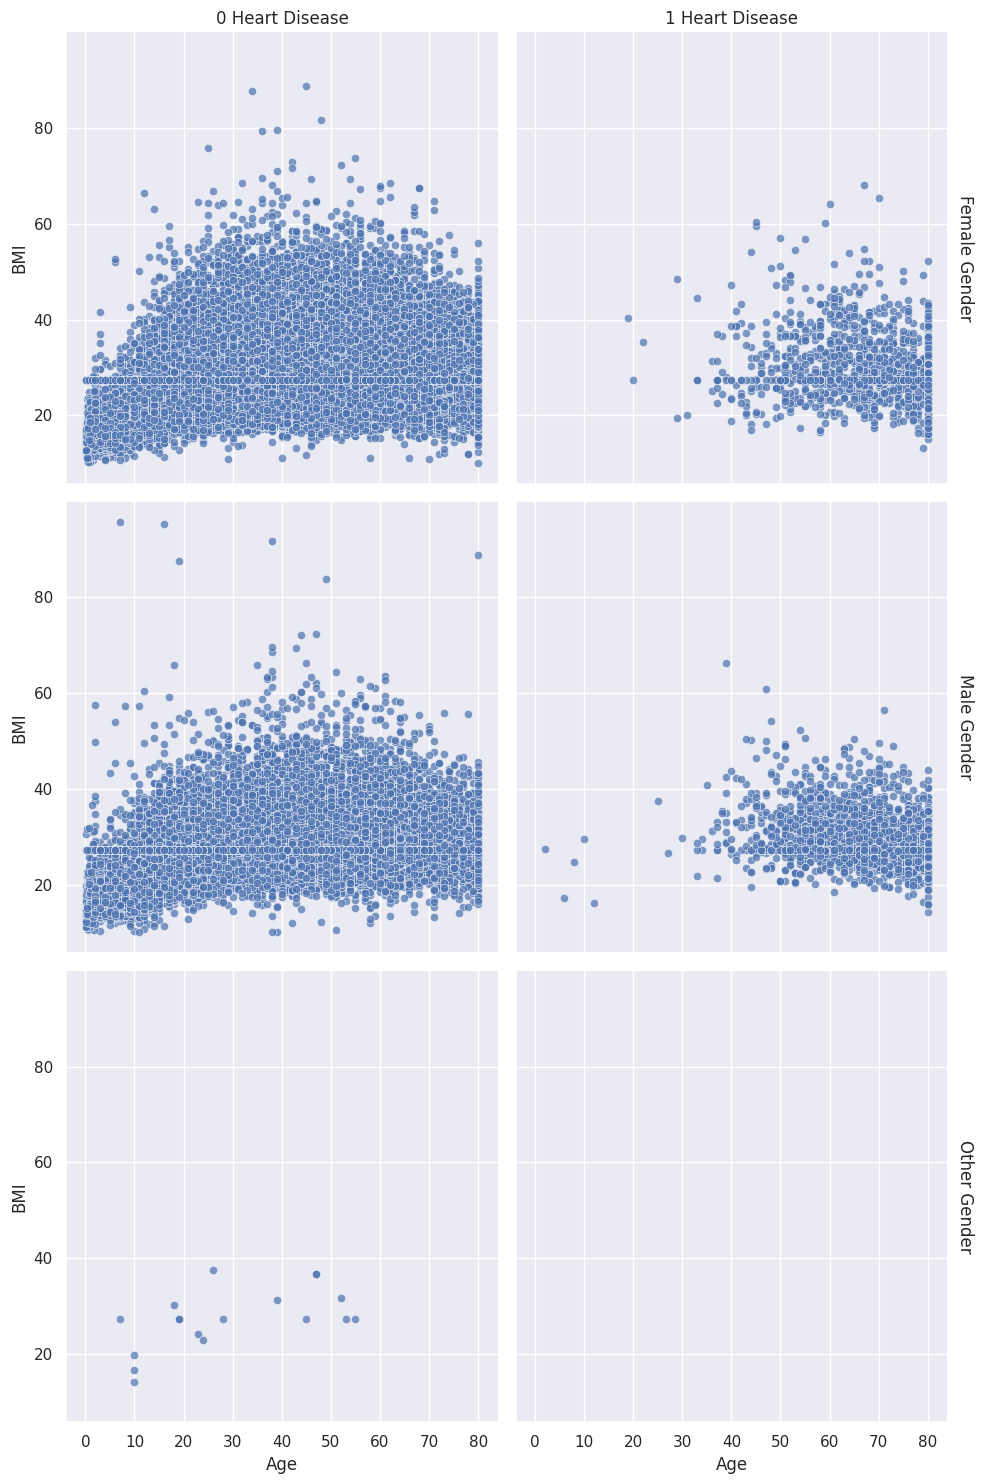

In [54]:
g = sns.FacetGrid(df, col='heart_disease', row='gender', margin_titles=True, height=5)
g.map(sns.scatterplot, 'age', 'bmi', alpha=0.7)
g.set_axis_labels('Age', 'BMI')
g.set_titles(col_template='{col_name} Heart Disease', row_template='{row_name} Gender')
plt.show()

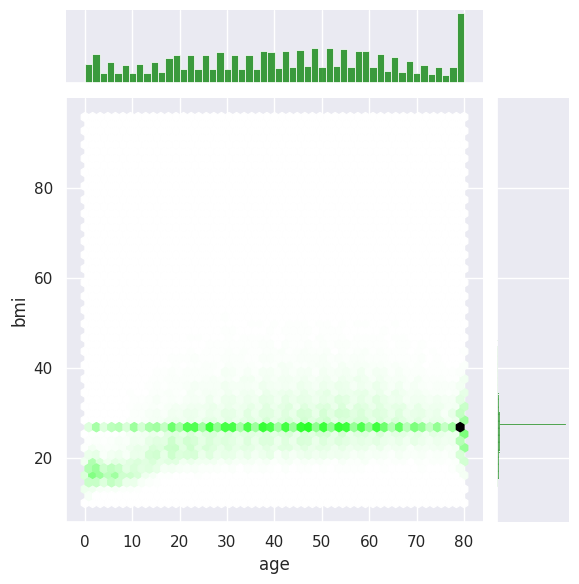

In [55]:
sns.jointplot(x='age', y='bmi', data=df, kind='hex', color='green')
plt.show()

/tmp/ipykernel_5214/616255852.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['bmi'], shade=True, color="r", alpha=0.7)


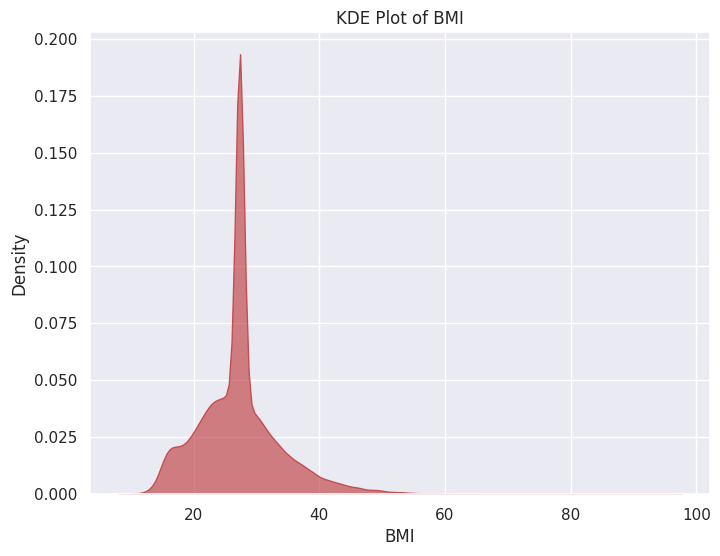

In [56]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['bmi'], shade=True, color="r", alpha=0.7)
plt.title('KDE Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

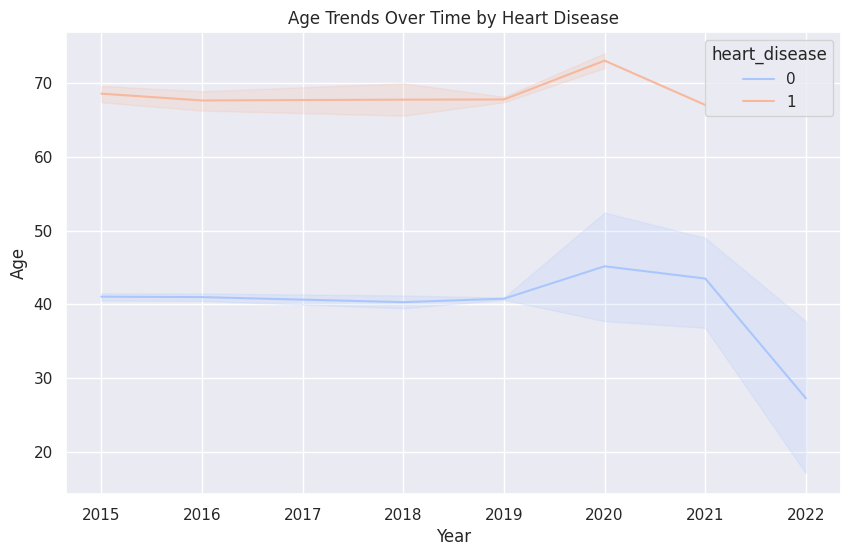

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='age', data=df, hue='heart_disease', palette='coolwarm')
plt.title('Age Trends Over Time by Heart Disease')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

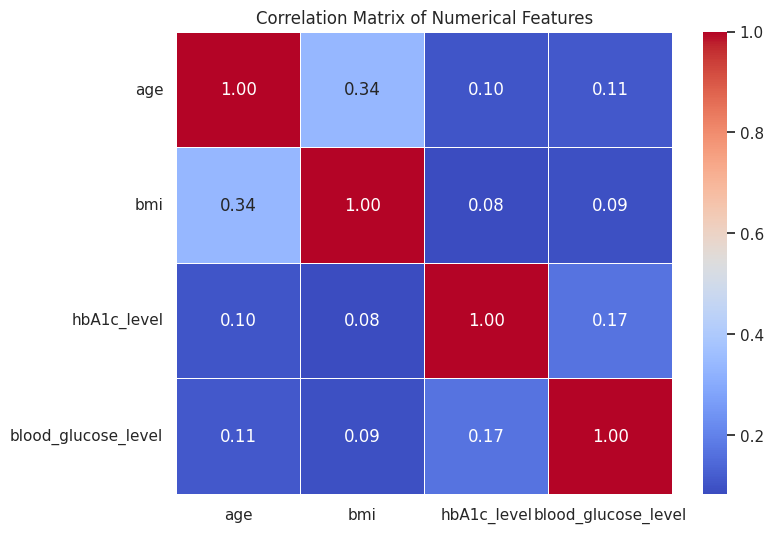

In [58]:
corr = df[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

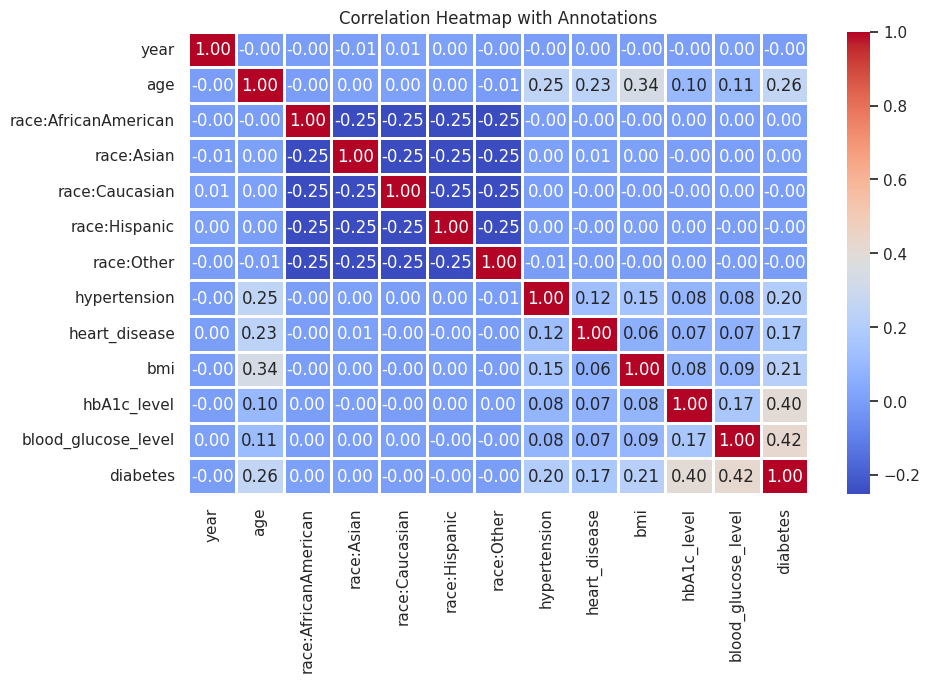

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap with Annotations')
plt.show()

In [60]:
df.to_csv('Diabetes_Preproccesd.csv',index=False)